# TASK 1
## To better understand the types of customers who purchase Chips and their purchasing behavior


### Importation of Important libraries and Understanding the Dataset

In [2]:
#Importation of the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import mode
import datetime

### Understanding the structure of each data set provided


#### Starting with the QVI Transaction Data 

In [3]:
#loading the data into python
Transactions=pd.read_excel('C:/Users/jennifer.okeke/Downloads/Final_Challenge/QVI_transaction_data.xlsx')

In [4]:
print(Transactions.columns)

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


In [5]:
#Rename specific columns
Transactions.rename(columns={'DATE': 'Date', 'STORE_NBR': 'Store_Number', 'LYLTY_CARD_NBR': 'Customer_Card_Number', 'TXN_ID': 'Purchase_ID', 'PROD_NBR': 'Product_Number', 'PROD_NAME': 'Product_Name',  'PROD_QTY': 'Production_Quantity', 'TOT_SALES': 'Total_Sales($)'}, inplace=True)

#Created assumptions to properly indicate the purpose for each columnn;
#LYLTY_CARD_NBR- a unique identifier for each customer that places an order hence changed to Customer_Card_Number
#TXN_ID- a unique identifier for each purchase of chips hence changed to Purchase_ID
#TOT_SALES- the revenue generated for each purchase hence in dollars.
# Print the updated DataFrame
print(Transactions.columns)

Index(['Date', 'Store_Number', 'Customer_Card_Number', 'Purchase_ID',
       'Product_Number', 'Product_Name', 'Production_Quantity',
       'Total_Sales($)'],
      dtype='object')


In [6]:
#See the first few rows of the DataFrame
print(Transactions.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-14             1                  1307          348              66   
2 2019-05-20             1                  1343          383              61   
3 2018-08-17             2                  2373          974              69   
4 2018-08-18             2                  2426         1038             108   

                               Product_Name  Production_Quantity  \
0    Natural Chip        Compny SeaSalt175g                    2   
1                  CCs Nacho Cheese    175g                    3   
2    Smiths Crinkle Cut  Chips Chicken 170g                    2   
3    Smiths Chip Thinly  S/Cream&Onion 175g                    5   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g                    3   

   Total_Sales($)  
0             6.0  
1             6.3  
2             2.9  
3            15.0  
4   

In [7]:
#Get summary statistics of numerical columns
print(Transactions.describe())

       Store_Number  Customer_Card_Number   Purchase_ID  Product_Number  \
count  264836.00000          2.648360e+05  2.648360e+05   264836.000000   
mean      135.08011          1.355495e+05  1.351583e+05       56.583157   
std        76.78418          8.057998e+04  7.813303e+04       32.826638   
min         1.00000          1.000000e+03  1.000000e+00        1.000000   
25%        70.00000          7.002100e+04  6.760150e+04       28.000000   
50%       130.00000          1.303575e+05  1.351375e+05       56.000000   
75%       203.00000          2.030942e+05  2.027012e+05       85.000000   
max       272.00000          2.373711e+06  2.415841e+06      114.000000   

       Production_Quantity  Total_Sales($)  
count        264836.000000   264836.000000  
mean              1.907309        7.304200  
std               0.643654        3.083226  
min               1.000000        1.500000  
25%               2.000000        5.400000  
50%               2.000000        7.400000  
75%      

In [8]:
#Get the number of rows and columns
num_rows = Transactions.shape[0]
num_cols = Transactions.shape[1]

#Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 264836
Number of columns: 8


In [9]:
#Get information about the columns and data types
print(Transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  264836 non-null  datetime64[ns]
 1   Store_Number          264836 non-null  int64         
 2   Customer_Card_Number  264836 non-null  int64         
 3   Purchase_ID           264836 non-null  int64         
 4   Product_Number        264836 non-null  int64         
 5   Product_Name          264836 non-null  object        
 6   Production_Quantity   264836 non-null  int64         
 7   Total_Sales($)        264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB
None


In [10]:
#Count the number of missing values in each column
print(Transactions.isnull().sum())

Date                    0
Store_Number            0
Customer_Card_Number    0
Purchase_ID             0
Product_Number          0
Product_Name            0
Production_Quantity     0
Total_Sales($)          0
dtype: int64


In [11]:
#Count the number of missing values in each column
print(Transactions.notnull().sum())

Date                    264836
Store_Number            264836
Customer_Card_Number    264836
Purchase_ID             264836
Product_Number          264836
Product_Name            264836
Production_Quantity     264836
Total_Sales($)          264836
dtype: int64


#### Looking through the data, everything seems to be clean and ready for analysis, to ensure we have accurate numbers for the analysis it is best to check and remove possible outliers, it is best to use the Production_Quantity column because, we have to get the actual sales by customers- that is the smoothen show of sales removing any analomies that might have happened along the line.

<Axes: >

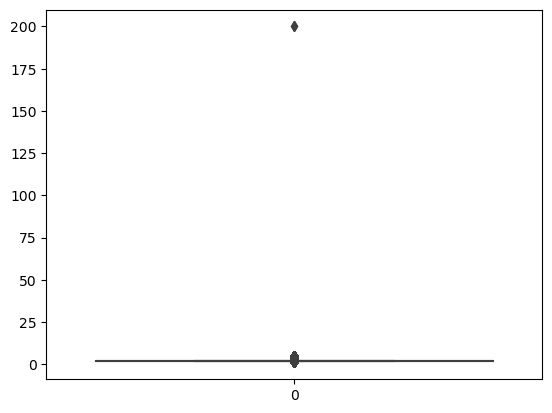

In [12]:
#Finding Outliers present in the Production_Quantity column
#Helps clean the data by eliminating errors or anomalies.
#It improves statistical analysis by providing more accurate measures and distributions.
#Because the insights from this analysis will be used for the supermarket’s strategic plan for the chip category in the next half year.

#Visualization of possible Outliers for Production_Quantity
column_data = Transactions['Production_Quantity']
sns.boxplot(data=column_data)


In [13]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the column
q1 = Transactions['Production_Quantity'].quantile(0.25)
q3 = Transactions['Production_Quantity'].quantile(0.75)

# Calculate the interquartile range (IQR) for the column
iqr = q3 - q1

# Set the multiplier for outlier detection (typically 1.5 or 3)
multiplier = 1.5

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - multiplier * iqr
upper_bound = q3 + multiplier * iqr

# Remove rows with outliers in the column from the same DataFrame
Transactions = Transactions[(Transactions['Production_Quantity'] >= lower_bound) & (Transactions['Production_Quantity'] <= upper_bound)]

#Reset the index
Transactions = Transactions.reset_index(drop=True)

#Print the updated DataFrame
print(Transactions.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-20             1                  1343          383              61   
2 2018-08-18             7                  7150         6900              52   
3 2019-05-18             9                  9208         8634              15   
4 2018-08-15            38                 38142        34181             108   

                               Product_Name  Production_Quantity  \
0    Natural Chip        Compny SeaSalt175g                    2   
1    Smiths Crinkle Cut  Chips Chicken 170g                    2   
2     Grain Waves Sour    Cream&Chives 210G                    2   
3                  Twisties Cheese     270g                    2   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g                    2   

   Total_Sales($)  
0             6.0  
1             2.9  
2             7.2  
3             9.2  
4   

#### Then the Purchase Behaviour datasets

In [14]:
#loading the data into python
Behaviour=pd.read_csv('C:/Users/jennifer.okeke/Downloads/Final_Challenge/QVI_purchase_behaviour.csv')

In [15]:
print(Behaviour.columns)

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')


In [16]:
#Rename specific columns
Behaviour.rename(columns={'LIFESTAGE': 'Life_Stage', 'PREMIUM_CUSTOMER': 'Premium_Customer', 'LYLTY_CARD_NBR': 'Customer_Card_Number'}, inplace=True)

#Created assumptions to properly indicate the purpose for each columnn;
#LYLTY_CARD_NBR- a unique identifier for each customer that places an order hence changed to Customer_Card_Number
# Print the updated DataFrame
print(Behaviour.columns)

Index(['Customer_Card_Number', 'Life_Stage', 'Premium_Customer'], dtype='object')


In [17]:
#See the first few rows of the DataFrame
print(Behaviour.head())

   Customer_Card_Number              Life_Stage Premium_Customer
0                  1000   YOUNG SINGLES/COUPLES          Premium
1                  1002   YOUNG SINGLES/COUPLES       Mainstream
2                  1003          YOUNG FAMILIES           Budget
3                  1004   OLDER SINGLES/COUPLES       Mainstream
4                  1005  MIDAGE SINGLES/COUPLES       Mainstream


In [18]:
#Get summary statistics of numerical columns
print(Behaviour.describe())

       Customer_Card_Number
count          7.263700e+04
mean           1.361859e+05
std            8.989293e+04
min            1.000000e+03
25%            6.620200e+04
50%            1.340400e+05
75%            2.033750e+05
max            2.373711e+06


In [19]:
#Get the number of rows and columns
num_rows = Behaviour.shape[0]
num_cols = Behaviour.shape[1]

#Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 72637
Number of columns: 3


In [20]:
#Get information about the columns and data types
print(Behaviour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer_Card_Number  72637 non-null  int64 
 1   Life_Stage            72637 non-null  object
 2   Premium_Customer      72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [21]:
#Count the number of missing values in each column
print(Behaviour.isnull().sum())

Customer_Card_Number    0
Life_Stage              0
Premium_Customer        0
dtype: int64


In [22]:
#Count the number of missing values in each column
print(Behaviour.notnull().sum())

Customer_Card_Number    72637
Life_Stage              72637
Premium_Customer        72637
dtype: int64


####  Looking through the data, everything seems to be clean and ready for analysis. The next step is to merge the Transaction and Behaviour Table, to begin analysis

In [23]:
# Perform an inner join based on a common column- Customer_Card_Number
Customer_Segment = pd.merge(Transactions, Behaviour, on='Customer_Card_Number')

In [24]:
#Get information about the columns and data types
print(Customer_Segment.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236039 entries, 0 to 236038
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  236039 non-null  datetime64[ns]
 1   Store_Number          236039 non-null  int64         
 2   Customer_Card_Number  236039 non-null  int64         
 3   Purchase_ID           236039 non-null  int64         
 4   Product_Number        236039 non-null  int64         
 5   Product_Name          236039 non-null  object        
 6   Production_Quantity   236039 non-null  int64         
 7   Total_Sales($)        236039 non-null  float64       
 8   Life_Stage            236039 non-null  object        
 9   Premium_Customer      236039 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 19.8+ MB
None


In [25]:
#See the first few rows of the DataFrame
print(Customer_Segment.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-20             1                  1343          383              61   
2 2018-08-18             7                  7150         6900              52   
3 2018-08-04             7                  7150         6899              90   
4 2018-10-31             7                  7150         6901              87   

                              Product_Name  Production_Quantity  \
0   Natural Chip        Compny SeaSalt175g                    2   
1   Smiths Crinkle Cut  Chips Chicken 170g                    2   
2    Grain Waves Sour    Cream&Chives 210G                    2   
3        Tostitos Smoked     Chipotle 175g                    2   
4  Infuzions BBQ Rib   Prawn Crackers 110g                    2   

   Total_Sales($)              Life_Stage Premium_Customer  
0             6.0   YOUNG SINGLES/COUPLES        

In [26]:
#Get the number of rows and columns
num_rows = Customer_Segment.shape[0]
num_cols = Customer_Segment.shape[1]

#Print the number of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 236039
Number of columns: 10


In [27]:
#To understand the variety of chips, some might have a high price while other might be low.
#Analyzing the data based only the total sales might be misleading, so it is best to know the unit price for each unique chip variant. from there ascertain, if they all have close to the same in price.
#If not,the best fit is to use their production_quantity, I assummed purchased.

#Calculate the unit price by dividing total sales by production quantity
Customer_Segment['Unit_Price'] = Customer_Segment['Total_Sales($)'] / Customer_Segment['Production_Quantity']


In [28]:
# Calculate the maximum and minimum unit prices
max_unit_price = Customer_Segment['Unit_Price'].max()
min_unit_price = Customer_Segment['Unit_Price'].min()
mode_unit_price = Customer_Segment['Unit_Price'].mode()

# Print the maximum and minimum unit prices
print("Maximum Unit Price:", max_unit_price)
print("Minimum Unit Price:", min_unit_price)
print("Mode Unit Price:", mode_unit_price)

#From the observation that all unit prices is within the same threhold, so we can proceed to use the total sales for the analysis but to check, we can also use production_quantity

Maximum Unit Price: 6.5
Minimum Unit Price: 1.35
Mode Unit Price: 0    4.6
Name: Unit_Price, dtype: float64


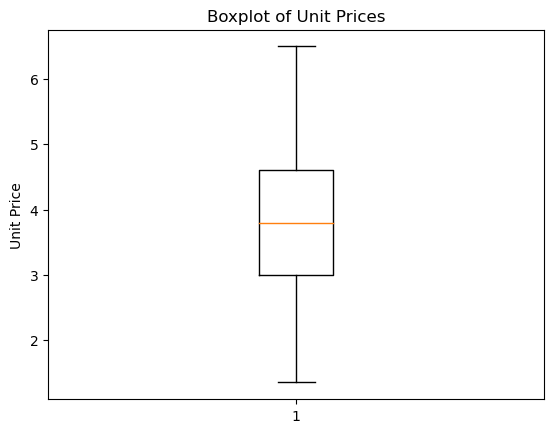

In [29]:
#A boxplot to show how unit prices are distributed.
plt.boxplot(Customer_Segment['Unit_Price'])
plt.ylabel('Unit Price')
plt.title('Boxplot of Unit Prices')
plt.show()

### Data analysis and customer segments

#### The first part is to understand what we have in our data to draw conclusion based on just Life_Stage and Premium_Customer- This will help us understand where most of the sales is coming in and take us deeper to find sales driver.

#### Based on the Life_Stage, how much sales does each bring?

In [30]:
# Group the data by 'Life_Stage' and calculate the sum of 'sales' for each group
total_sales = Customer_Segment.groupby('Life_Stage')['Total_Sales($)'].sum()

# Print the total sales based on customer type
print(round(total_sales))

#I will repeat the same for 'Production_Quantity' to consolidate the point
total_qty= Customer_Segment.groupby('Life_Stage')['Production_Quantity'].sum()

# Print the total sales based on customer type
print( )
print(round(total_qty))

Life_Stage
MIDAGE SINGLES/COUPLES    172706.0
NEW FAMILIES               46389.0
OLDER FAMILIES            336658.0
OLDER SINGLES/COUPLES     378841.0
RETIREES                  341436.0
YOUNG FAMILIES            300743.0
YOUNG SINGLES/COUPLES     235004.0
Name: Total_Sales($), dtype: float64

Life_Stage
MIDAGE SINGLES/COUPLES    44514
NEW FAMILIES              11752
OLDER FAMILIES            90280
OLDER SINGLES/COUPLES     97948
RETIREES                  87510
YOUNG FAMILIES            80368
YOUNG SINGLES/COUPLES     59706
Name: Production_Quantity, dtype: int64


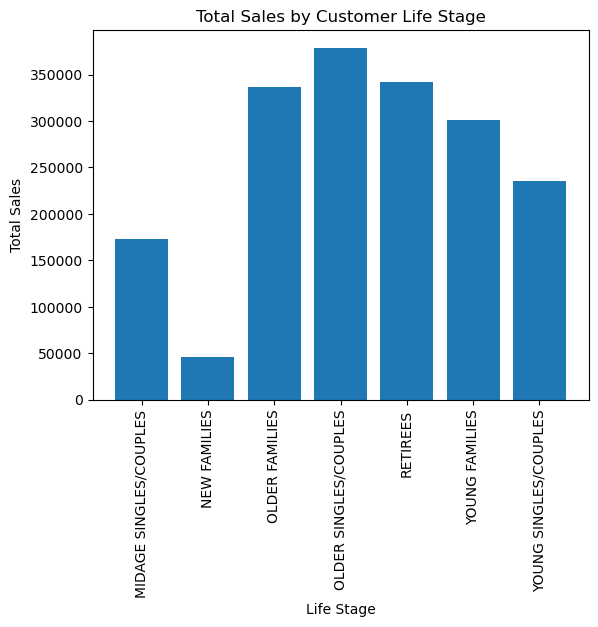

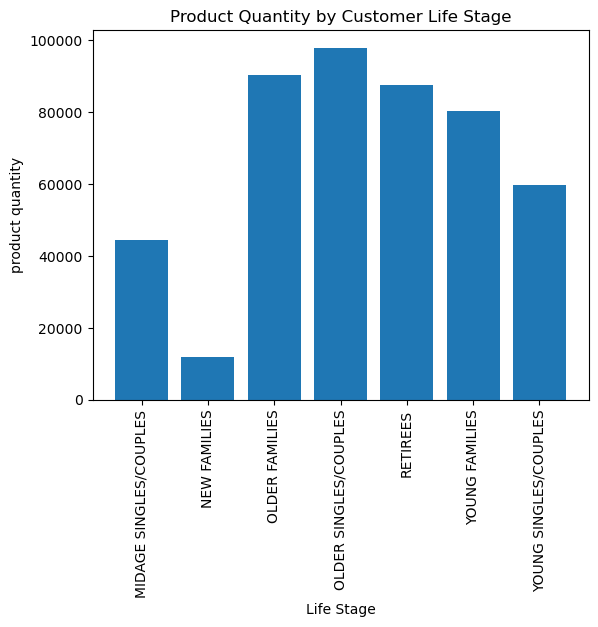

In [31]:
# Create a bar plot of total sales based on customer life stage
plt.bar(total_sales.index, total_sales)
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Life Stage')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()

# Create a bar plot of product quantity based on customer life stage
plt.bar(total_qty.index, total_qty)
plt.xlabel('Life Stage')
plt.ylabel('product quantity')
plt.title('Product Quantity by Customer Life Stage')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()

#This shows that the group of customers that purchase most chips are the 'OLDER SINGLES/COUPLES' and least is 'NEW FAMILIES' based on both Total sales and production Quantity
#Now, i will drill further to see their behaviour in terms of buying.

In [32]:
#I also want to understand by how many percentage does each Lifestage take in total sales.
# Calculate the total sales for each customer type
sales_by_life_stage = Customer_Segment.groupby('Life_Stage')['Total_Sales($)'].sum()

# Calculate the total sales across all customer types
total_sales = sales_by_life_stage.sum()

# Calculate the percentage of sales for each customer type
sales_percentage = (sales_by_life_stage/ total_sales) * 100

# Print the resulting sales percentage
print(round(sales_percentage))

#This consolidates the point that most sales is coming from the 'OLDER SINGLES/COUPLES' and the least sales is coming from 'NEW FAMILIES'.
# With this insight, it will help us focus more on what 'OLDER SINGLES/COUPLES' is buying, so as to make proper recommendation for-The supermarket’s strategic plan-

Life_Stage
MIDAGE SINGLES/COUPLES    10.0
NEW FAMILIES               3.0
OLDER FAMILIES            19.0
OLDER SINGLES/COUPLES     21.0
RETIREES                  19.0
YOUNG FAMILIES            17.0
YOUNG SINGLES/COUPLES     13.0
Name: Total_Sales($), dtype: float64


#### Knowing the Life stage that brings in most of the sales, how then is it influenced by the Purchase Behaviour?
#### Note: That is how do they buy?

Premium_Customer
Budget        635249.0
Mainstream    702054.0
Premium       474473.0
Name: Total_Sales($), dtype: float64

Premium_Customer
Budget        166716
Mainstream    181126
Premium       124236
Name: Production_Quantity, dtype: int64


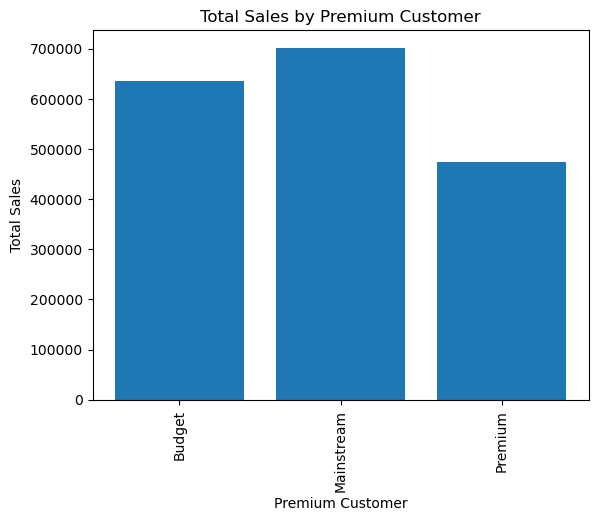

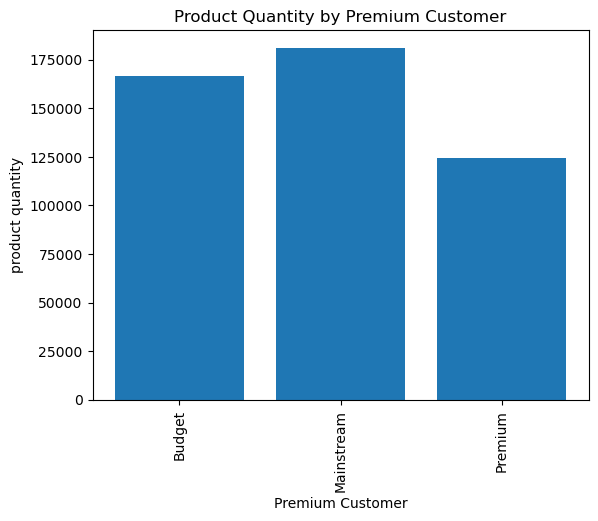

In [33]:
#First, I have to understand how customers buy in general from there drilldown to the LIfestage that brings the most sales
# Group the data by 'Premium_Customer' and calculate the sum of 'sales' for each group
total_sales_pp = Customer_Segment.groupby('Premium_Customer')['Total_Sales($)'].sum()

# Print the total sales based on customer type
print(round(total_sales_pp))

#I will repeat the same for 'Production_Quantity' to consolidate the point
total_qty_pp= Customer_Segment.groupby('Premium_Customer')['Production_Quantity'].sum()

# Print the total sales based on customer type
print( )
print(round(total_qty_pp))

# Create a bar plot of total sales based on customer life stage
plt.bar(total_sales_pp .index, total_sales_pp )
plt.xlabel('Premium Customer')
plt.ylabel('Total Sales')
plt.title('Total Sales by Premium Customer')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()

# Create a bar plot of product quantity based on customer life stage
plt.bar(total_qty_pp.index, total_qty_pp)
plt.xlabel('Premium Customer')
plt.ylabel('product quantity')
plt.title('Product Quantity by Premium Customer')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed
plt.show()

#From this we can see that a large percentage of the customers use the 'Mainstream' Plan, but is that what -OLDER SINGLES/COUPLES- uses the most?
#We have to investigate.

Premium_Customer          Budget  Mainstream   Premium
Life_Stage                                            
MIDAGE SINGLES/COUPLES   33073.9     85283.1   54348.8
NEW FAMILIES             20113.4     15660.7   10614.6
OLDER FAMILIES          160873.3     98846.5   76937.7
OLDER SINGLES/COUPLES   128835.0    125474.8  124531.0
RETIREES                105386.1    144864.4   91185.4
YOUNG FAMILIES          132748.6     88131.9   79862.3
YOUNG SINGLES/COUPLES    54218.3    143792.2   36993.2


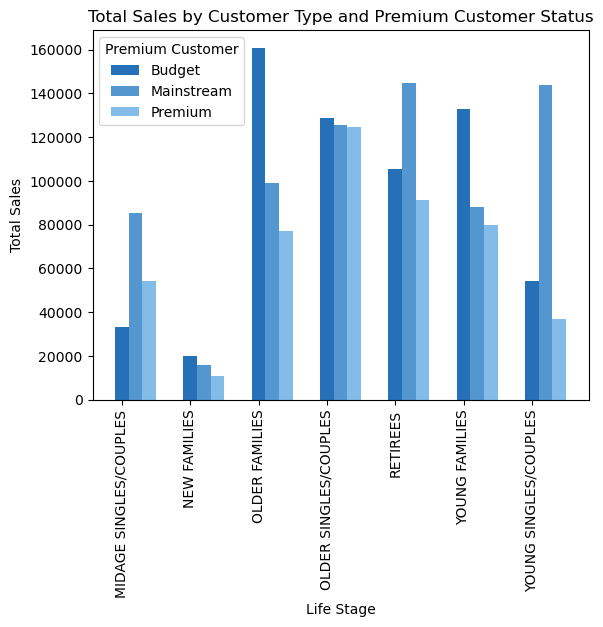

In [34]:
# Create a pivot table to summarize the total sales by Life stage and Purchase Behaviour(premuim customer)
pivot_table = pd.pivot_table(Customer_Segment, values='Total_Sales($)', index='Life_Stage', columns='Premium_Customer', aggfunc=sum)

# Print the pivot table
print(pivot_table)


# Define the colors for the clustered bar plot
colors = ['#2670B8', '#5496D0', '#83BBE9', '#B2E2FF']  # Blue variant colors

# Create a clustered bar plot of the pivot table
n = len(pivot_table)
x = np.arange(n)
width = 0.2
labels = pivot_table.columns

fig, ax = plt.subplots()
for i, col in enumerate(pivot_table.columns):
    ax.bar(x + (i * width), pivot_table[col], width, label=col, color=colors[i])

ax.set_xticks(x)
ax.set_xticklabels(pivot_table.index)
plt.xlabel('Life Stage')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Type and Premium Customer Status')
plt.legend(title='Premium Customer')
plt.xticks(rotation=90)  # Rotate the x-axis labels if needed


plt.show()

#Drilling down to 'OLDER SINGLES/COUPLES' & 'NEW FAMILIES'- we can see that they both subscribe more to the 'Budget' Purchase plan.
#But focus will be on -'OLDER SINGLES/COUPLES'- because it is bring in the most sales.
#Since -OLDER SINGLES/COUPLES- have about 21% of sales share of the total sales, then we can recommend the Budget
#And also Mainstream plan because it has the highest sales for all the customers as well.
#So focus should be on the two.

In [35]:
#I will go further to break down the product name column into brand name and packet size
Customer_Segment['Packet_Size'] = Customer_Segment['Product_Name'].str.extract('(\d+)', expand=False)

# Extract the brand name by removing the packet size from the 'Product_Name' column
brand_names = Customer_Segment['Product_Name'].str.replace(r'\d+(\.\d+)?g', '', regex=True).str.strip()

# Add the extracted packet sizes and brand names as new columns in the DataFrame
Customer_Segment['Brand_Name'] = brand_names

print(Customer_Segment.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-20             1                  1343          383              61   
2 2018-08-18             7                  7150         6900              52   
3 2018-08-04             7                  7150         6899              90   
4 2018-10-31             7                  7150         6901              87   

                              Product_Name  Production_Quantity  \
0   Natural Chip        Compny SeaSalt175g                    2   
1   Smiths Crinkle Cut  Chips Chicken 170g                    2   
2    Grain Waves Sour    Cream&Chives 210G                    2   
3        Tostitos Smoked     Chipotle 175g                    2   
4  Infuzions BBQ Rib   Prawn Crackers 110g                    2   

   Total_Sales($)              Life_Stage Premium_Customer  Unit_Price  \
0             6.0   YOUNG SINGLES/CO

In [36]:
# Remove white spaces from the 'Brand_Name' column
Customer_Segment['Brand_Name'] = Customer_Segment['Brand_Name'].str.strip()


In [37]:
# Remove extra spaces between words in the 'Brand_Name' column
Customer_Segment['Brand_Name'] = Customer_Segment['Brand_Name'].str.replace(r'\s+', ' ', regex=True)

# Print the resulting DataFrame
print(Customer_Segment.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-20             1                  1343          383              61   
2 2018-08-18             7                  7150         6900              52   
3 2018-08-04             7                  7150         6899              90   
4 2018-10-31             7                  7150         6901              87   

                              Product_Name  Production_Quantity  \
0   Natural Chip        Compny SeaSalt175g                    2   
1   Smiths Crinkle Cut  Chips Chicken 170g                    2   
2    Grain Waves Sour    Cream&Chives 210G                    2   
3        Tostitos Smoked     Chipotle 175g                    2   
4  Infuzions BBQ Rib   Prawn Crackers 110g                    2   

   Total_Sales($)              Life_Stage Premium_Customer  Unit_Price  \
0             6.0   YOUNG SINGLES/CO

In [38]:
#Modifying the packet size column
Customer_Segment['Packet_Size'] = Customer_Segment['Packet_Size'].str.replace('g', '').astype(float)
Customer_Segment.rename(columns={'Packet_Size': 'Packet_Size(g)'}, inplace=True)

In [39]:
#Get information about the columns and data types
print(Customer_Segment.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236039 entries, 0 to 236038
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  236039 non-null  datetime64[ns]
 1   Store_Number          236039 non-null  int64         
 2   Customer_Card_Number  236039 non-null  int64         
 3   Purchase_ID           236039 non-null  int64         
 4   Product_Number        236039 non-null  int64         
 5   Product_Name          236039 non-null  object        
 6   Production_Quantity   236039 non-null  int64         
 7   Total_Sales($)        236039 non-null  float64       
 8   Life_Stage            236039 non-null  object        
 9   Premium_Customer      236039 non-null  object        
 10  Unit_Price            236039 non-null  float64       
 11  Packet_Size(g)        236039 non-null  float64       
 12  Brand_Name            236039 non-null  object        
dtyp

In [40]:
# Extract the first two words from the Brand_Name column to give the name of the brand.
Customer_Segment['Brand'] = Customer_Segment['Brand_Name'].apply(lambda x: ' '.join(x.split()[:1]))

# Display the first few rows of the updated DataFrame
print(Customer_Segment.head())

        Date  Store_Number  Customer_Card_Number  Purchase_ID  Product_Number  \
0 2018-10-17             1                  1000            1               5   
1 2019-05-20             1                  1343          383              61   
2 2018-08-18             7                  7150         6900              52   
3 2018-08-04             7                  7150         6899              90   
4 2018-10-31             7                  7150         6901              87   

                              Product_Name  Production_Quantity  \
0   Natural Chip        Compny SeaSalt175g                    2   
1   Smiths Crinkle Cut  Chips Chicken 170g                    2   
2    Grain Waves Sour    Cream&Chives 210G                    2   
3        Tostitos Smoked     Chipotle 175g                    2   
4  Infuzions BBQ Rib   Prawn Crackers 110g                    2   

   Total_Sales($)              Life_Stage Premium_Customer  Unit_Price  \
0             6.0   YOUNG SINGLES/CO

In [41]:
#investigating Brand
# Count unique brand 
unique_brands =Customer_Segment['Brand'].nunique()

# Calculate total sales for each brand
total_sales_by_brand = Customer_Segment.groupby('Brand')['Total_Sales($)'].sum()

# Display the results
print("Number of unique brands:", unique_brands)
print("Total sales by brand:")
print(total_sales_by_brand)

Number of unique brands: 29
Total sales by brand:
Brand
Burger          6283.6
CCs            16732.8
Cheetos        15495.2
Cheezels       37329.0
Cobs           66598.8
Dorito         37232.0
Doritos       189497.4
French          7278.0
Grain          40456.8
GrnWves         7886.4
Infuzions      71712.8
Infzns         21500.4
Kettle        367253.6
NCC             7428.0
Natural        31632.0
Old            85215.9
Pringles      166592.5
RRD            60108.9
Red            27915.3
Smith          13452.4
Smiths        196084.9
Snbts           4688.6
Sunbites        4216.0
Thins          83486.7
Tostitos       74923.2
Twisties       76618.8
Tyrrells       48484.8
WW             33212.0
Woolworths     12458.4
Name: Total_Sales($), dtype: float64


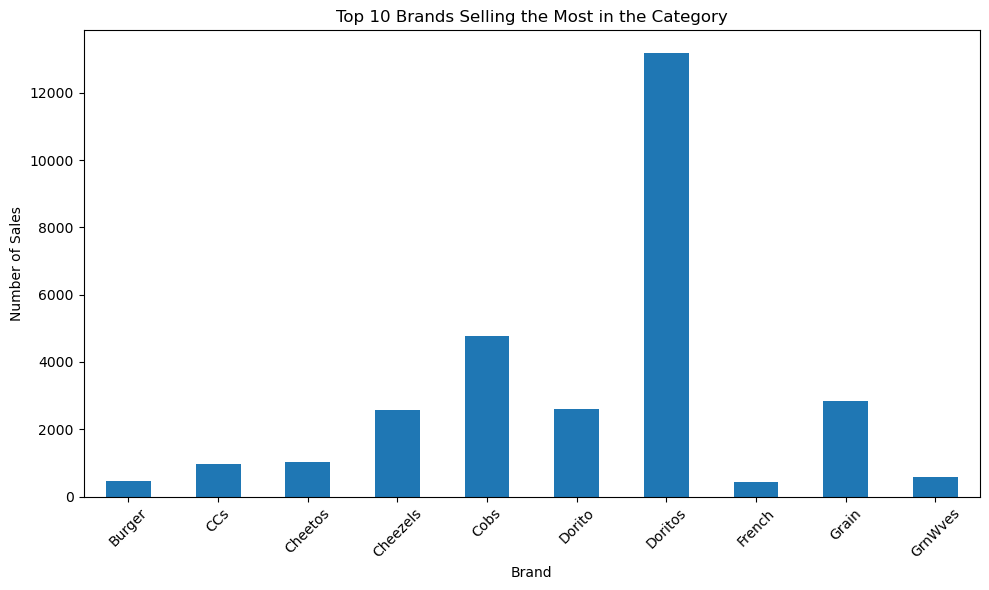

In [46]:
# to get the best chips from the category of older singles/couples from the budget plan
# Filter data based on customer type
filtered_data = Customer_Segment[
    (Customer_Segment['Life_Stage'] == 'OLDER SINGLES/COUPLES') &
    (Customer_Segment['Premium_Customer'] == 'Budget')
]

# Group data by brand and count occurrences
brand_counts = filtered_data.groupby('Brand')['Total_Sales($)'].sum()

# Get the top 10 brands
top_10_brands = brand_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar')
plt.title('Top 10 Brands Selling the Most in the Category')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


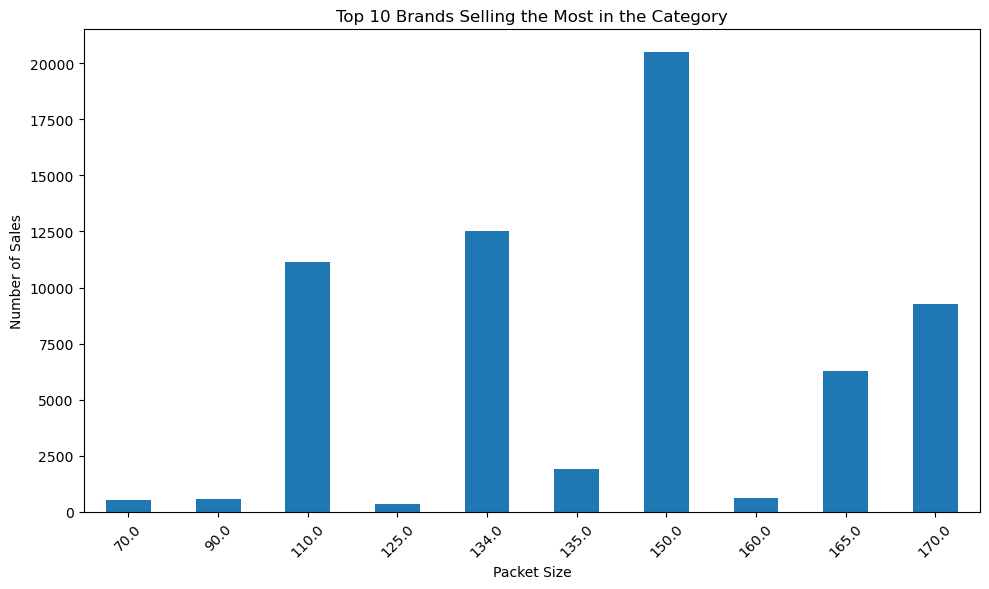

In [48]:
# to get the best chips from the category of older singles/couples from the budget plan
# Filter data based on customer type
filtered_data = Customer_Segment[
    (Customer_Segment['Life_Stage'] == 'OLDER SINGLES/COUPLES') &
    (Customer_Segment['Premium_Customer'] == 'Budget')
]

# Group data by brand and count occurrences
brand_counts = filtered_data.groupby('Packet_Size(g)')['Total_Sales($)'].sum()

# Get the top 10 brands
top_10_brands = brand_counts.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_brands.plot(kind='bar')
plt.title('Top 10 Brands Selling the Most in the Category')
plt.xlabel('Packet Size')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [56]:
# Group by purchase plan and brand and calculate total sales
grouped_data = Customer_Segment.groupby(['Premium_Customer', 'Brand'])['Total_Sales($)'].sum().reset_index()

# Sort by total sales
sorted_data = grouped_data.sort_values(by='Total_Sales($)', ascending=False)

# Get top ten brand names for each purchase plan
top_ten_brands = {}
purchase_plans = sorted_data['Premium_Customer'].unique()

for plan in purchase_plans:
    top_brands = sorted_data[sorted_data['Premium_Customer'] == plan].head(10)['Brand'].tolist()
    top_ten_brands[plan] = top_brands

# Display the results
for plan, brands in top_ten_brands.items():
    print(f"Top ten brands for {plan}:")
    print(brands)
    print()

Top ten brands for Mainstream:
['Kettle', 'Doritos', 'Smiths', 'Pringles', 'Old', 'Thins', 'Twisties', 'Tostitos', 'Infuzions', 'Cobs']

Top ten brands for Budget:
['Kettle', 'Smiths', 'Doritos', 'Pringles', 'Old', 'Thins', 'Twisties', 'Tostitos', 'Infuzions', 'Cobs']

Top ten brands for Premium:
['Kettle', 'Smiths', 'Doritos', 'Pringles', 'Thins', 'Old', 'Twisties', 'Tostitos', 'Infuzions', 'Cobs']



In [46]:
# Group by purchase plan and packet size and calculate total sales
grouped_data = Customer_Segment.groupby(['Premium_Customer', 'Packet_Size(g)'])['Total_Sales($)'].sum().reset_index()

# Sort by total sales
sorted_data = grouped_data.sort_values(by='Total_Sales($)', ascending=False)

# Get top ten packet size for each purchase plan
top_ten_brands = {}
purchase_plans = sorted_data['Premium_Customer'].unique()

for plan in purchase_plans:
    top_brands = sorted_data[sorted_data['Premium_Customer'] == plan].head(10)['Packet_Size(g)'].tolist()
    top_ten_brands[plan] = top_brands

# Display the results
for plan, brands in top_ten_brands.items():
    print(f"Top ten Packet Size for {plan}:")
    print(brands)
    print()
    
#From this we can deduce that all three Purchase plan have the same features in them based on the packet size and Brand.

Top ten Packet Size for Mainstream:
[175.0, 150.0, 134.0, 110.0, 170.0, 330.0, 300.0, 165.0, 380.0, 270.0]

Top ten Packet Size for Budget:
[175.0, 150.0, 134.0, 110.0, 170.0, 330.0, 300.0, 165.0, 380.0, 270.0]

Top ten Packet Size for Premium:
[175.0, 150.0, 134.0, 110.0, 170.0, 330.0, 300.0, 165.0, 380.0, 270.0]



In [47]:
# Group the data by Purchase_Plan and calculate the average of Total_Sales
average_sales_by_plan = Customer_Segment.groupby('Premium_Customer')['Total_Sales($)'].mean()

# Group the data by Purchase_Plan and calculate the maximum of Total_Sales
max_sales_by_plan = Customer_Segment.groupby('Premium_Customer')['Total_Sales($)'].max()

# Group the data by Purchase_Plan and calculate the minimum of Total_Sales
min_sales_by_plan = Customer_Segment.groupby('Premium_Customer')['Total_Sales($)'].min()

# Display the average sales by purchase plan
print("Average Sales by Purchase Plan:")
print(average_sales_by_plan)
print(" ")

# Display the maximum and minimum sales by purchase plan
print("Maximum Sales by Purchase Plan:")
print(max_sales_by_plan)
print(" ")
print("Minimum Sales by Purchase Plan:")
print(min_sales_by_plan)

#From below we can deduce that Budget Plan has the lowest Average sales with a small margin even though it has the highest minimum sales.
#We can say that that Budget plans gives the most packet friendly offer.

Average Sales by Purchase Plan:
Premium_Customer
Budget        7.620727
Mainstream    7.752102
Premium       7.638253
Name: Total_Sales($), dtype: float64
 
Maximum Sales by Purchase Plan:
Premium_Customer
Budget        13.0
Mainstream    13.0
Premium       13.0
Name: Total_Sales($), dtype: float64
 
Minimum Sales by Purchase Plan:
Premium_Customer
Budget        2.9
Mainstream    2.7
Premium       2.7
Name: Total_Sales($), dtype: float64


In [48]:
#I will further go to check if it is because of the unit price for the chips 

# Group by purchase plan and packet size and calculate total sales
grouped_data = Customer_Segment.groupby(['Premium_Customer', 'Unit_Price'])['Total_Sales($)'].sum().reset_index()

# Sort by total sales
sorted_data = grouped_data.sort_values(by='Total_Sales($)', ascending=False)

# Get top ten unit price for each purchase plan
top_ten_brands = {}
purchase_plans = sorted_data['Premium_Customer'].unique()

for plan in purchase_plans:
    top_brands = sorted_data[sorted_data['Premium_Customer'] == plan].head()['Unit_Price'].tolist()
    top_ten_brands[plan] = top_brands

# Display the results
for plan, brands in top_ten_brands.items():
    print(f"Top ten Unit price for {plan}:")
    print(brands)
    print()
    
#From this we can conclude that is not because of unit price.

Top ten Unit price for Mainstream:
[4.6, 5.4, 4.4, 3.7, 3.8, 5.7, 3.0, 3.3, 5.1, 4.2]

Top ten Unit price for Budget:
[4.6, 5.4, 4.4, 3.7, 3.8, 3.0, 5.7, 3.3, 5.1, 4.2]

Top ten Unit price for Premium:
[4.6, 5.4, 4.4, 3.7, 3.8, 3.0, 5.7, 3.3, 5.1, 4.2]



In [49]:
# Group the table by 'Premium_Customer' and calculate the min, max, and mode of 'Unit_Price'
grouped = Customer_Segment.groupby('Premium_Customer')['Unit_Price'].agg(['min', 'max'])

# Calculate the mode of 'Unit_Price' for each Premium Customer
mode_values = Customer_Segment.groupby('Premium_Customer')['Unit_Price'].apply(lambda x: mode(x, axis=None, keepdims=True)[0][0])

# Add the mode values to the grouped DataFrame
grouped['mode'] = mode_values

# Print the minimum, maximum, and mode for each Premium Customer
for customer, values in grouped.iterrows():
    print("Premium Customer:", customer)
    print("Minimum Unit Price:", values['min'])
    print("Maximum Unit Price:", values['max'])
    print("Mode Unit Price:", values['mode'])
    print()  # Print an empty line for separation
    
#From this, we can draw that the price range within the each Purchase Plan, is very simiilar as shown below of it's min , max and mode values.


Premium Customer: Budget
Minimum Unit Price: 1.45
Maximum Unit Price: 6.5
Mode Unit Price: 3.7

Premium Customer: Mainstream
Minimum Unit Price: 1.35
Maximum Unit Price: 6.5
Mode Unit Price: 4.6

Premium Customer: Premium
Minimum Unit Price: 1.35
Maximum Unit Price: 6.5
Mode Unit Price: 3.7



### Understanding sales by time of year to help plan for the next half of the year

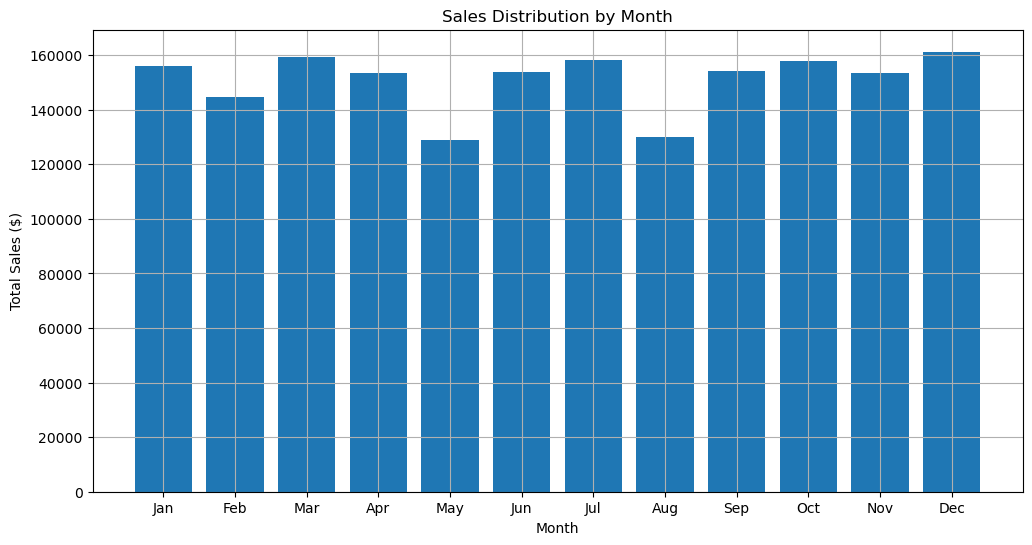

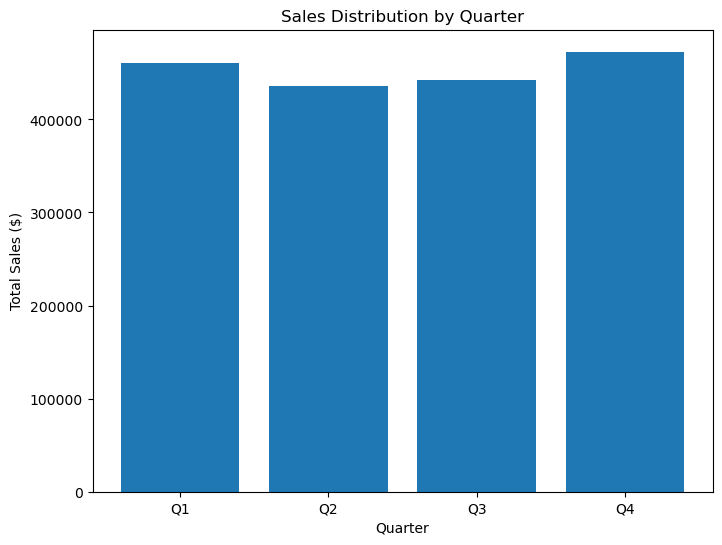

In [50]:
# Convert the 'Date' column to datetime type
Customer_Segment['Date'] = pd.to_datetime(Customer_Segment['Date'])

# Extract the month and quarter from the 'Date' column
Customer_Segment['Month'] = Customer_Segment['Date'].dt.month
Customer_Segment['Quarter'] = Customer_Segment['Date'].dt.quarter

# Calculate the total sales by month and quarter
sales_by_month = Customer_Segment.groupby('Month')['Total_Sales($)'].sum()
sales_by_quarter = Customer_Segment.groupby('Quarter')['Total_Sales($)'].sum()

# Plotting the sales distribution by month
plt.figure(figsize=(12, 6))
plt.bar([datetime.datetime(2000, month, 1).strftime('%b') for month in sales_by_month.index], sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Sales Distribution by Month')
plt.grid(True)
plt.show()

# Plotting the sales distribution by quarter
plt.figure(figsize=(8, 6))
plt.bar(['Q{}'.format(quarter) for quarter in sales_by_quarter.index], sales_by_quarter.values)
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.title('Sales Distribution by Quarter')
plt.grid(False)
plt.show()

#From here we can observe that dec has the best sales from the previous year and the quarter is the 4th quarter which plays a major part the half year of the previous year.

<Figure size 1000x600 with 0 Axes>

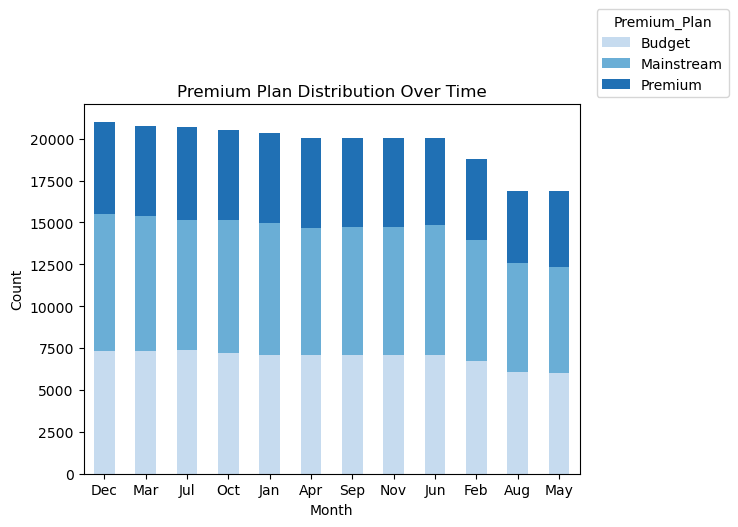

<Figure size 1000x600 with 0 Axes>

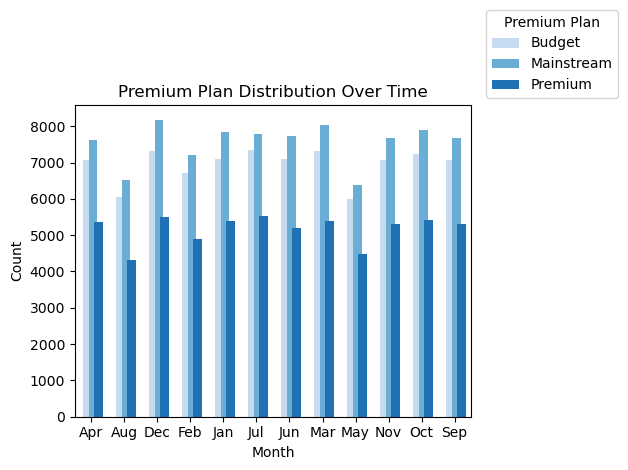

In [51]:
#Next is to understand the major players in each month inthe year.

#Convert the 'Date' column to datetime type
Customer_Segment['Date'] = pd.to_datetime(Customer_Segment['Date'])

# Extract the month from the 'Date' column and format it to MMM
Customer_Segment['Month'] = Customer_Segment['Date'].dt.strftime('%b')

# Group the table by 'Month' and 'Premium_plan' and calculate the count of occurrences
plan_counts = Customer_Segment.groupby(['Month', 'Premium_Customer']).size().unstack()

# Define a color palette in blue variant
colors = sns.color_palette('Blues', len(plan_counts.columns))

# Sort the DataFrame by the sum of each row in descending order
plan_counts_sorted = plan_counts.loc[plan_counts.sum(axis=1).sort_values(ascending=False).index]

# Create a stacked bar plot to visualize the distribution of Premium plans over time
plt.figure(figsize=(10, 6))
plan_counts_sorted.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Premium Plan Distribution Over Time')
plt.legend(title='Premium Plan')
plt.xticks(rotation=0)

# Move the legend outside the chart area
plt.legend(title='Premium_Plan', bbox_to_anchor=(1.02, 1), loc='lower left')
plt.show()


# Create a clustered bar plot to visualize the distribution of Premium plans over time
plt.figure(figsize=(10, 6))
ax = plan_counts.plot(kind='bar', color=colors)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Premium Plan Distribution Over Time')
plt.legend(title='Premium Plan')
plt.xticks(rotation=0)

# Adjust the position and width of the bars to create a clustered effect
num_bars = len(plan_counts.columns)
bar_width = 0.8 / num_bars
for i, container in enumerate(ax.containers):
    container_width = bar_width * (i + 0.5 - num_bars / 2)
    plt.setp(container, width=bar_width)
    
# Move the legend outside the chart area
plt.legend(title='Premium Plan', bbox_to_anchor=(1.02, 1), loc='lower left')

plt.tight_layout()
  

plt.show()

#The point of this portion is to see if the time of time-months influence the Purchase Plan customers choose;
# From the first chart, we can see that Months like- Dec, Mar, Jul, Oct, Jan, Apr- are the top 6 months for Sales based on count of Purchase Plan
#Drilling down to the top months, in the second plot- we can see that for the top 6 and others, 'Mainstream' followed by 'Budget' are highest plan used
#From this we can not really draw why Customers choose a certain Purchase Plan more Information is needed.
# From the analysis above, since we don't know the reason for  Purchase Plan, I'll give a recommendation based on my findings.
# I was able to see that 'OLDER SINGLES/COUPLES' have the highest sales using the 'Budget' plan and the Lifestage with the least sales is 'NEW FAMILIES' with the same plan.
# The highest Purchase Plan used generally is the 'Mainstream'
#Budget Plan has the lowest Average sales with a small margin even though it has the highest minimum sales.
#We can say that that Budget plans gives the most packet friendly offer.
#RECOMMENDATION
#- More data on how to understand Customer behaviour is needed.
#-The supermarket’s strategic plan for the chip category in the next half year should consider the Lifestage-'OLDER SINGLES/COUPLES';
#- More compaigns should be pushed at them with plans of expanding the budget plan for that customer segment.
#- In general Compaigns should also be pushed to encourage Mainstream plans for the next half of year because it is the most popular among the customers.


In [52]:
# Export the DataFrame to an CSV file
Customer_Segment.to_csv('C:/Users/jennifer.okeke/Downloads/DASL/Customer_Segment3.csv', index=False)